In [26]:
import pandas as pd

# 데이터 준비
california_df = pd.read_csv('California Housing Prices.csv')
california_df.head(), california_df.shape

(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income  median_house_value ocean_proximity  
 0       322.0       126.0         8.3252            452600.0        NEAR BAY  
 1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
 2       496.0       177.0         7.2574            352100.0        NEAR BAY  
 3       558.0       219.0         5.6431            341300.0        NEAR BAY  
 4       565.0       259.0         3.8462            342200.0        NEAR BAY  ,
 (20640, 10))

In [27]:
from sklearn.preprocessing import LabelEncoder

# object → int 
le_disaster = LabelEncoder()
california_df['ocean_proximity'] = le_disaster.fit_transform(california_df['ocean_proximity'])
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [28]:
california_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [29]:
# 결측치 처리
california_df = california_df.dropna()
california_df.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [30]:
# 중복 데이터 확인 및 제거
# california_df.duplicated().sum()
# california_df.drop_duplicates(inplace=True)

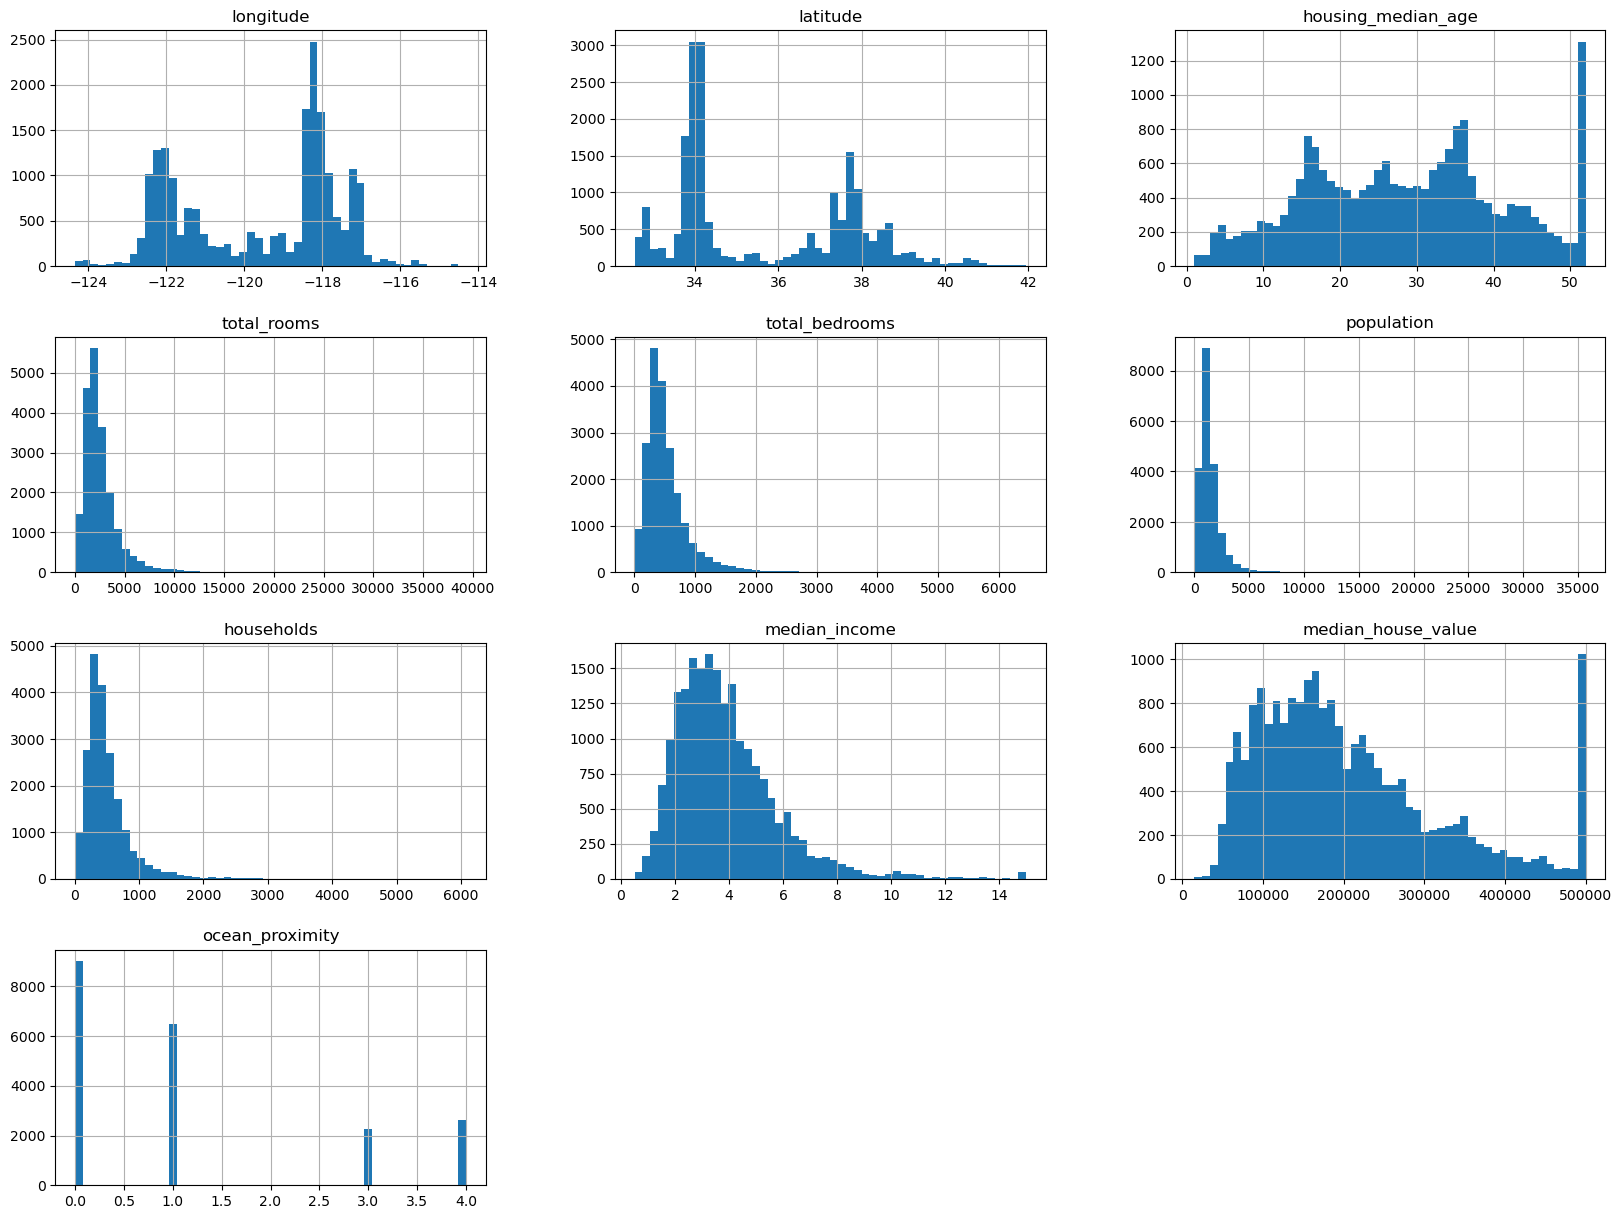

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
california_df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

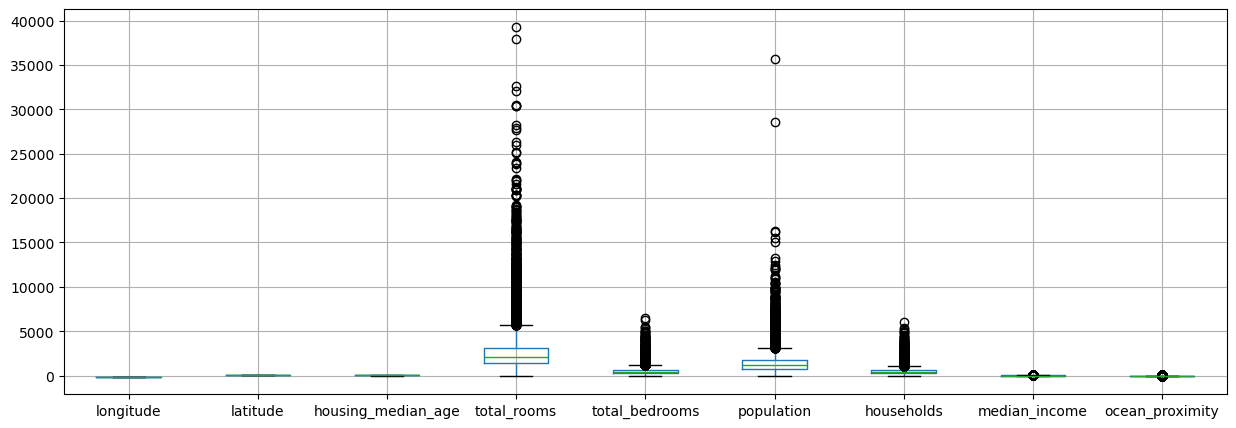

In [32]:
# 이상치 확인
california_df.drop('median_house_value', axis=1).boxplot(figsize=(15,5))

In [33]:
# 이상치 제거
california_df = california_df[california_df['population'] <= 25000]

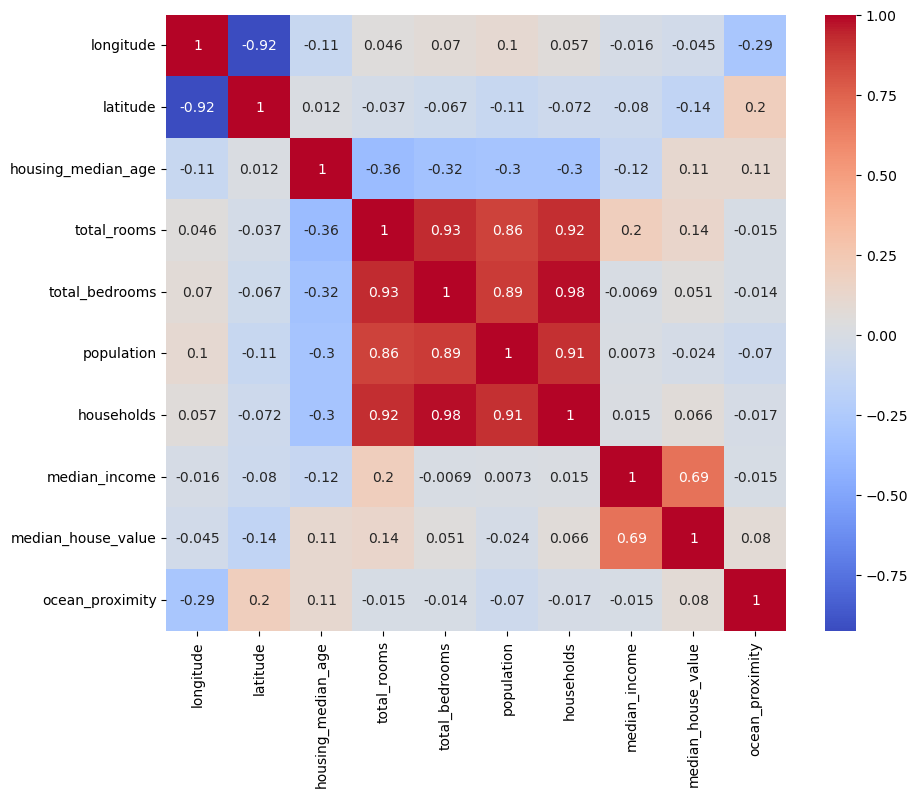

In [34]:
# 상관관계
corr_mat = california_df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm')
plt.show()

In [35]:
# 왜도 확인
# california_df.skew()

import numpy as np
california_df['total_rooms'] = np.log1p(california_df['total_rooms'])
california_df['total_bedrooms'] = np.log1p(california_df['total_bedrooms'])
california_df['population'] = np.log1p(california_df['population'])
california_df['households'] = np.log1p(california_df['households'])
california_df.skew()

longitude            -0.296177
latitude              0.464925
housing_median_age    0.061452
total_rooms          -1.086391
total_bedrooms       -0.997944
population           -1.059084
households           -1.062255
median_income         1.644436
median_house_value    0.978142
ocean_proximity       1.015923
dtype: float64

In [36]:
from sklearn.model_selection import train_test_split

X = california_df.drop(columns=['median_house_value'])
# X = california_df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = california_df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# 데이터 스케일링
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# 모델 훈련
# from sklearn.linear_model import LassoCV
# model = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
# model.fit(X_train_scaled, y_train)
# model.alpha_

# from sklearn.linear_model import Lasso
# model = Lasso(alpha=10)

# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

# from sklearn.linear_model import Ridge
# model = Ridge(alpha=1.0)

# from sklearn.linear_model import ElasticNet
# model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()

# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_estimators=150)

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

# from sklearn.neural_network import MLPRegressor
# model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000)

model.fit(X_train_scaled, y_train)

pred = model.predict(X_test_scaled)

In [39]:
# 앙상블
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

y_pred = (pred + xgb_pred) / 2

In [40]:
# 훈련 정확도
train_acc = model.score(X_train_scaled, y_train)
train_acc

0.7896996216865464

In [41]:
# 테스트 정확도
test_acc = model.score(X_test_scaled, y_test)
test_acc

0.7604743777215323

In [42]:
# MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

2565217457.380954

In [43]:
# r2_score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.8089626155647613